In [20]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set 'Digits' from sklearn
from sklearn.datasets import load_digits

In [3]:
# Storing the data in digit_data variable
digit_data = load_digits()

In [4]:
# Checking the contents of digit_data variable
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# The 'data' sub variable stores the pixel values of images
# The pixel values appears as 8*8 order , so there are 64 elements as 1D array
digit_data['data'][0] # This is the first image's pixel values

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digit_data['data'][51] # This is the 50th image's pixel values

array([ 0.,  0.,  0.,  3., 15., 10.,  1.,  0.,  0.,  0.,  0., 11., 10.,
       16.,  4.,  0.,  0.,  0.,  0., 12.,  1., 15.,  6.,  0.,  0.,  0.,
        0.,  3.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
        0.,  0.,  4., 15., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16.,
       15.,  9.,  3.,  0.,  0.,  0.,  0.,  4.,  9., 14.,  7.,  0.])

<Figure size 640x480 with 0 Axes>

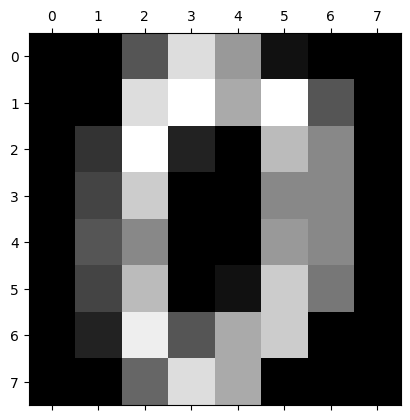

In [8]:
# The Images subvariable contents the images precisely
plt.gray()
plt.matshow(digit_data['images'][0]) # This is the first image

<Figure size 640x480 with 0 Axes>

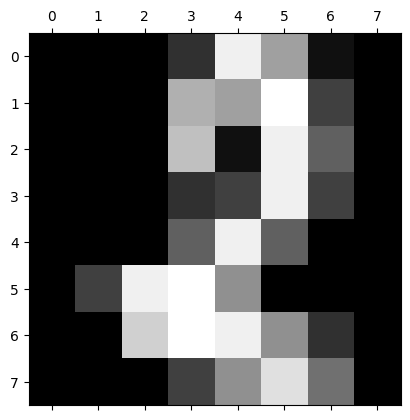

In [9]:
plt.gray()
plt.matshow(digit_data['images'][51]) # This is the 50th image

In [10]:
# The target sub variable is actually the targets
digit_data['target'][0:6] # This is the first 6 targeted images

array([0, 1, 2, 3, 4, 5])

In [11]:
# For this data set, the 'data' sub variable is the input and the 'target' sub variable is the output
X = digit_data['data']
y = digit_data['target']

In [12]:
# Constructing the training and testing sample with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (1437, 64)
Shape of X_test is: (360, 64)
Shape of y_train is: (1437,)
Shape of y_test is: (360,)


In [13]:
# Define the LogoisticRegression object
model = LogisticRegression()

In [14]:
# Fit the model with training sample; X_train and y_train
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Predicting the outcome of the model as y_pred
y_pred = model.predict(X_test)

In [16]:
# Check the accuracy of the model
accuracy_score(y_test, y_pred)

0.95

In [19]:
# Though the model is 95% accureate, there is 5% discripency in the model
# It is nearly impossible to find out where the model goes wrong
# In such situations, confusion matrix is used as a tool
cnfm = confusion_matrix(y_test, y_pred)
cnfm

array([[41,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 31,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 41,  0,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  0, 35]])

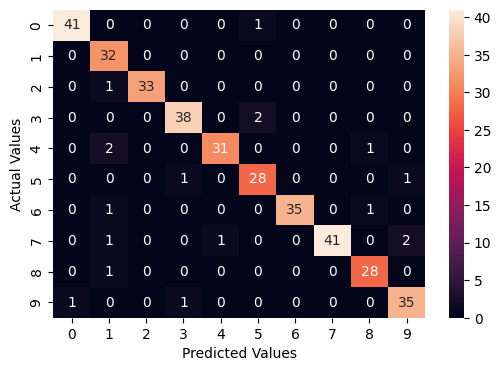

In [21]:
# Plotting the confusion matrix
plt.figure(figsize = (6,4))
sns.heatmap(cnfm, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()